# Dynamic Programming

In [1]:
import networkx as nx
import random
from utils import random_graph, create_adjacency_matrix
import math
from dynamic_programming import dp

In [2]:
# If AttributeError: module 'scipy.sparse' has no attribute 'coo_array'
# pip install --upgrade scipy networkx

# Number of nodes in graph (User Input)
n = 4

def create_graph(n, is_directed = True, is_complete = True):
    """
    Creates a directed and/or completed graph with n nodes
    
    :n: number of nodes in the graph
    :is_directed: is graph directed - default: True
    :is_complete: is graph complete - default: True
    
    :returns (default: a directed complet) nx.graph
    """
    if is_directed:
        graph = random_graph(n, True)
    else:
        graph = random_graph(n)
    if not is_complete:
        for i in range(0, math.floor(n / 2)):
            edges_to_remove = random.sample(range(0,n-1), 2)
            graph.remove_edge(edges_to_remove[0], edges_to_remove[1])
    return graph

created_graph = create_graph(n)
adj_graph = create_adjacency_matrix(created_graph)
new_graph = adj_graph.todense().tolist()
print(new_graph)

/Users/danielpark/Documents/directed-salesman/utils.py:219: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return nx.adjacency_matrix(graph)


[[0.0, 1.0670323240045831, 0.6918561998597937, 0.6947032376438091], [0.42444518186052793, 0.0, 0.8026570098770023, 0.7839175400956016], [0.6943479235930435, 0.3881088581593256, 0.0, 0.018887388358884306], [0.7262782802622666, 0.3302100948719308, 0.19918838937192362, 0.0]]


In [3]:
def dp_runner(i, bitmask, distance_matrix):
    """
    Traverses the graph and finds the shortest Hamiltonian path on a graph 
    using dynamic programming by caching inner paths to find most optimal path

    :i: ith node
    :bitmask: represents the remaining nodes in the subset (TODO: bits are faster to operate)

    :returns: cost of the most efficient path
    """
    cache = [[-1]*(1 << (n)) for _ in range(n)]
    
    # Base case: 
    # if only ith bit and 1st bit is set in our bitmask
    # we have visited all other nodes already
    if bitmask == ((1 << i) | 3):
        return distance_matrix[1][i]
  
    # Memoize visited distances
    if cache[i][bitmask] != -1:
        return cache[i][bitmask]
    
    # Result of the sub-problem
    result = 10**9
  
    # Travel to all nodes j and end the path at ith node
    for j in range(1, n):
        if (bitmask & (1 << j)) != 0 and j != i and j != 1:
            result = min(result, dp_runner(j, bitmask & (~(1 << i)), distance_matrix) + distance_matrix[j][i])
    
    # Store minimum value
    cache[i][bitmask] = result
    return result

The solution path is [0.0, 0.8026570098770023, 0.7839175400956016]
The cost of most efficient path is 1.1517544931078174


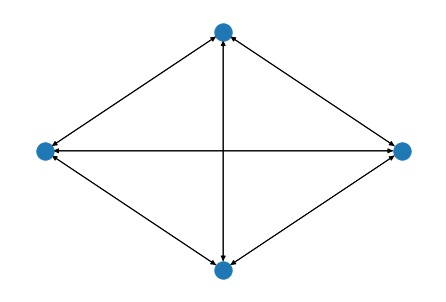

In [4]:
# Driver program
cost = 10**9
solution_path = []

# Go from node 1 visiting all nodes in between to i
# Return to i when complete
for i in range(1, n):
    cost = min(cost, dp_runner(i, (1 << n)-1, new_graph) + new_graph[i][1])
    solution_path.append(new_graph[1][i])

print(f"The solution path is {solution_path}")
print(f"The cost of most efficient path is {cost}")
nx.draw_circular(created_graph)

In [5]:
# Test dynamic_programming.py
print(dp(created_graph))

(1.1517544931078174, [0.0, 0.8026570098770023, 0.7839175400956016])


/Users/danielpark/Documents/directed-salesman/utils.py:219: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return nx.adjacency_matrix(graph)


## Sources

1. https://www.youtube.com/watch?v=Q4zHb-Swzro&t=118s&ab_channel=AbdulBari
2. http://www.lsi.upc.edu/~mjserna/docencia/algofib/P07/dynprog.pdf
3. https://medium.com/basecs/speeding-up-the-traveling-salesman-using-dynamic-programming-b76d7552e8dd
4. https://www.geeksforgeeks.org/travelling-salesman-problem-using-dynamic-programming/#:~:text=Travelling%20Salesman%20Problem%20(TSP)%3A,returns%20to%20the%20starting%20point.
5. https://www.geeksforgeeks.org/traveling-salesman-problem-tsp-implementation/
6. https://networkx.org/documentation/stable/reference/generated/networkx.linalg.graphmatrix.adjacency_matrix.html
7. https://people.eecs.berkeley.edu/~vazirani/algorithms/chap6.pdf
8. https://realpython.com/python-bitwise-operators/